## About Dataset
### Parkinson's Data Set
- This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

- The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (little '@' robots.ox.ac.uk).

### Attribute Information:
- Matrix column entries (attributes):
    - name - ASCII subject name and recording number
    - MDVP:Fo(Hz) - Average vocal fundamental frequency
    - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    - MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    - MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
    - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    - NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
    - status - The health status of the subject (one) - Parkinson's, (zero) - healthy
    - RPDE, D2 - Two nonlinear dynamical complexity measures
    - DFA - Signal fractal scaling exponent
    - spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## TASK 
### PCA Task:
##### Question:
- You are given a dataset of biomedical voice measurements from people with and without Parkinson’s Disease.
- Your task is to apply PCA to reduce dimensionality and analyze how well the principal components separate the two classes (Parkinson’s vs. Healthy).
 
##### Instructions:
- Load the Parkinson’s dataset. 
 
- Drop the name column (not a feature). 
 
- Standardize the features using StandardScaler. 
 
- Apply PCA to reduce dimensions to 2 or 3 components. 
 
- Visualize the first two components in a scatter plot colored by disease status (status column). 
 
- Plot the explained variance ratio and cumulative explained variance. 
 
- Analyze whether PCA reveals good separation between healthy and Parkinson’s-affected individuals.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
# Load the dataset
df = pd.read_csv("parkinsons.data")

In [28]:
# Drop the 'name' column
df.drop(columns=['name'], inplace=True)

In [29]:
# Extract features and target
X = df.drop(columns=['status'])
y = df['status']

In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [32]:
# Create a dataframe with principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Status'] = y

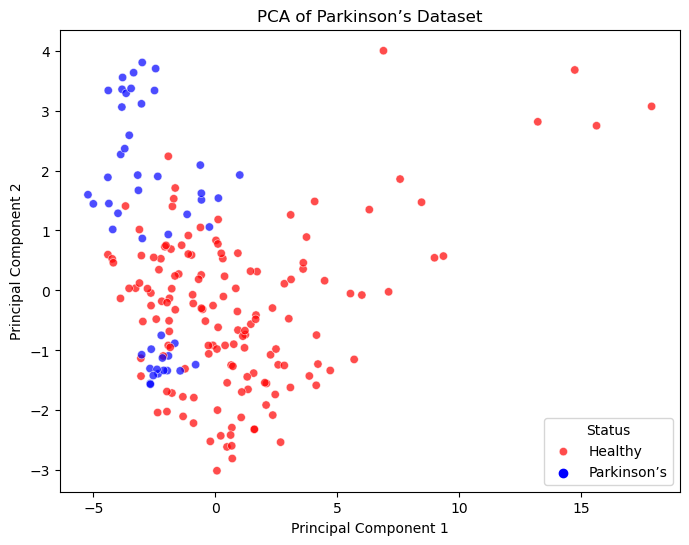

In [33]:
# Scatter plot of first two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Status', data=pca_df, palette=['blue', 'red'], alpha=0.7)
plt.title('PCA of Parkinson’s Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Status', labels=['Healthy', 'Parkinson’s'])
plt.show()

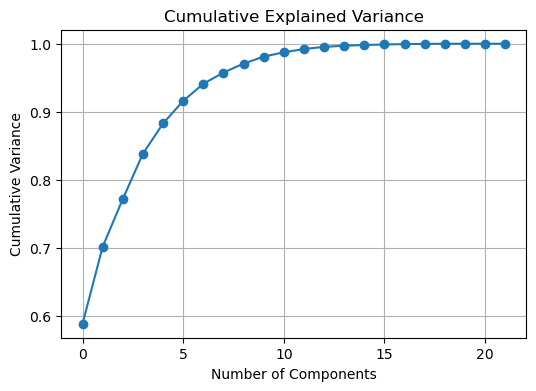

In [34]:
# Plot explained variance
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

In [35]:
# Analyze separation
print(f'Explained Variance Ratios: {explained_variance}')
print(f'Cumulative Explained Variance: {cumulative_variance[-1]:.2f}')

Explained Variance Ratios: [0.58900504 0.1129943 ]
Cumulative Explained Variance: 0.70
